# 저장된 회귀 모델로 예측하기

## 데이터 불러오기

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15,10

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [29]:
# 통합데이터 불러오기
ori_df = pd.read_csv("./통합데이터_추가수정(사업체수 추가).csv", encoding="euc-kr")
ori_df.head(2)

,역사명,역위도,역경도,일평균승하차(명),상가 면적,거주자수,남여비율,1인 가구수 레벨,1인 가구수(세대),사업체수,20~40대 인구 수 레벨,고속버스 터미널,기차역,여객 터미널,주변 관광지,주변 대학교,일평균(원)
0,가야역,35.155883,129.042817,5799,11.0,25217,0.95,83,6291,49,57,NaN,1.0,NaN,0,0,1926082
1,감전역,35.155528,128.991146,6107,10.0,12825,1.12,56,5461,57,31,NaN,NaN,NaN,0,0,2535118


In [153]:
df = ori_df[['역사명','거주자수','일평균승하차(명)','1인 가구수(세대)','사업체수','상가 면적','일평균(원)']]
df

,역사명,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,가야역,25217,5799,6291,49,11.0,1926082
1,감전역,12825,6107,5461,57,10.0,2535118
2,강서구청,2076,4251,4630,109,NaN,2029127
3,개금역,27187,13621,2501,36,37.0,4717075
4,거제(법원·검찰청),27403,9546,3093,114,16.0,3099526
...,...,...,...,...,...,...,...
95,충렬사(안락),18134,5398,1851,35,10.0,1117126
96,토성,28882,13846,2110,7,75.0,6002230
97,하단,21407,29080,4414,36,166.0,11010043
98,해운대역,24427,18794,5075,80,59.0,8828608


### 결측치 제거

In [154]:
df.isnull().sum()

역사명           0
거주자수          0
일평균승하차(명)     0
1인 가구수(세대)    0
사업체수          0
상가 면적         9
일평균(원)        0
dtype: int64

In [155]:
df.fillna(0,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8976\1840858203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0,inplace=True)


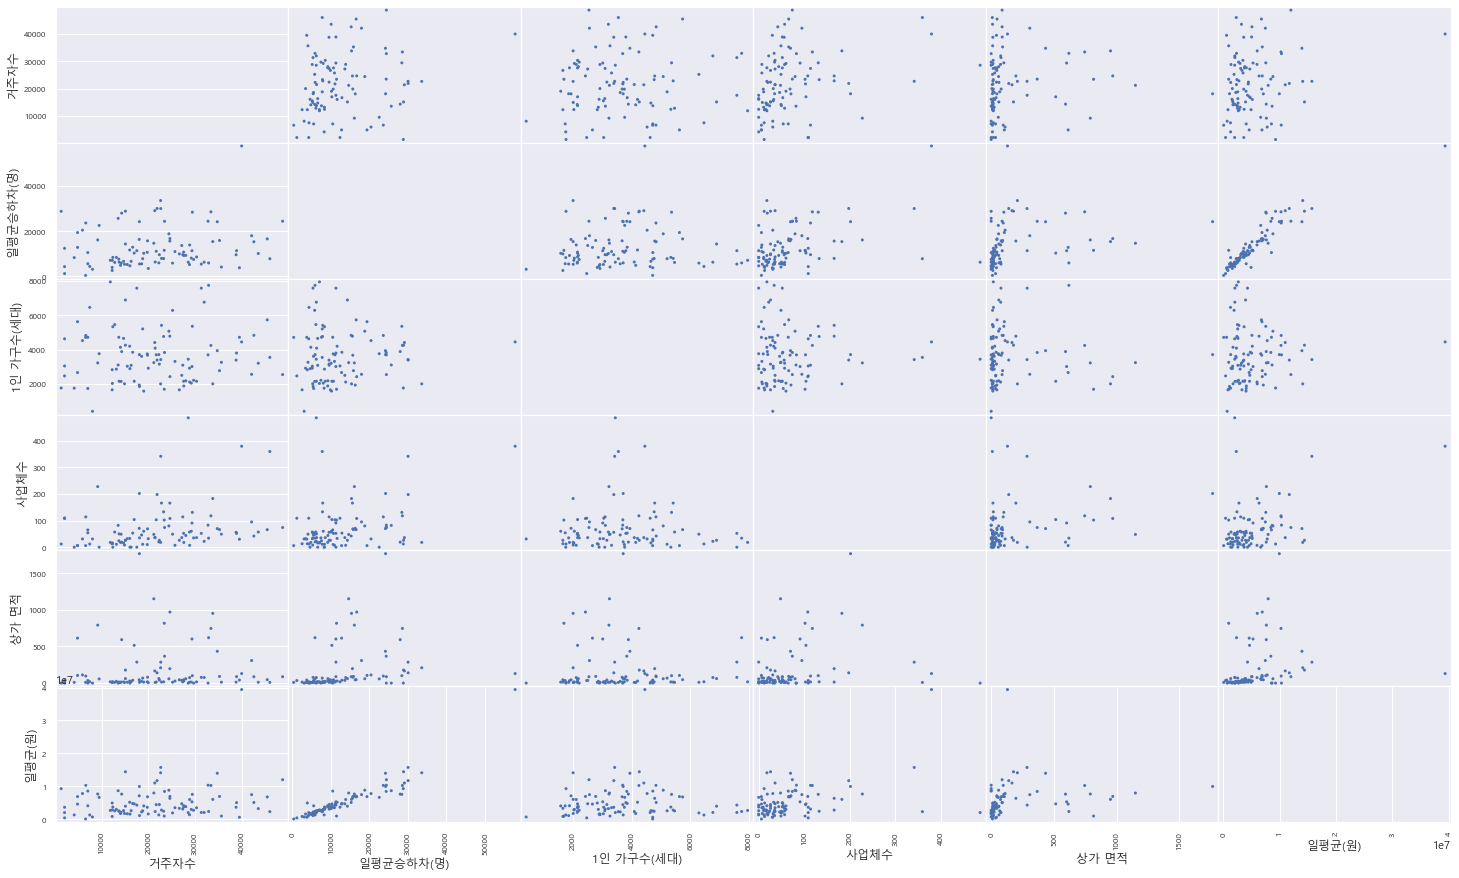

In [33]:
# 전체 변수와 일평균 수익 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [14]:
df_dr_corr = df.corr()
df_dr_corr

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
거주자수,1.000000,0.177225,0.041797,0.278248,0.071730,0.199948
일평균승하차(명),0.177225,1.000000,0.033473,0.355560,0.300601,0.919696
1인 가구수(세대),0.041797,0.033473,1.000000,-0.011647,-0.032205,0.036853
사업체수,0.278248,0.355560,-0.011647,1.000000,0.234948,0.420679
상가 면적,0.071730,0.300601,-0.032205,0.234948,1.000000,0.238792
일평균(원),0.199948,0.919696,0.036853,0.420679,0.238792,1.000000


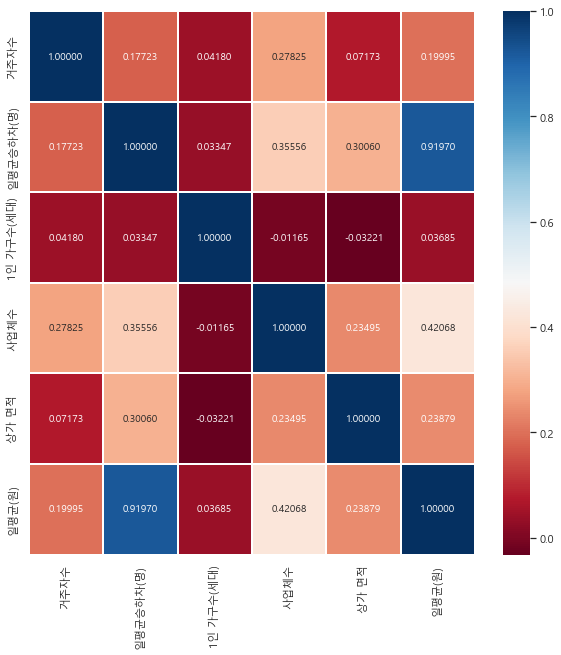

In [15]:
plt.figure(figsize=(10,10))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## 데이터 표준화(Standard)

In [122]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_standard = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
df_standard

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,1인 가구수(세대),거주자수,사업체수,상가 면적,역사명,일평균(원),일평균승하차(명)
0,1.733581,0.339065,-0.241846,-0.487547,NaN,-0.668974,-0.765385
1,1.191488,-0.784368,-0.144670,-0.490985,NaN,-0.543833,-0.731520
2,0.648742,-1.758850,0.486972,-0.525371,NaN,-0.647801,-0.935587
3,-0.741760,0.517661,-0.399757,-0.398146,NaN,-0.095497,0.094641
4,-0.355110,0.537243,0.547707,-0.470354,NaN,-0.427862,-0.353403
...,...,...,...,...,...,...,...
95,-1.166290,-0.303065,-0.411904,-0.490985,NaN,-0.835193,-0.809475
96,-0.997131,0.671327,-0.752019,-0.267482,NaN,0.168569,0.119380
97,0.507667,-0.006342,-0.399757,0.045423,NaN,1.197545,1.794353
98,0.939382,0.267445,0.134710,-0.322498,NaN,0.749317,0.663411


## 데이터 정규화(MinMaxScaler)

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
df.drop(["역사명"],axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8976\963618318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["역사명"],axis=1,inplace=True)


In [139]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [140]:
df_scaled = scaler.transform(df)
df_scaled

array([[0.50299325, 0.09486778, 0.77994171, 0.10061602, 0.00622524,
        0.04680149],
       [0.24177909, 0.10022617, 0.6699788 , 0.11704312, 0.00565931,
        0.06229773],
       [0.01519815, 0.06793667, 0.55988341, 0.2238193 , 0.        ,
        0.04942335],
       [0.54451939, 0.2309499 , 0.27782194, 0.07392197, 0.02093945,
        0.1178152 ],
       [0.54907251, 0.16005567, 0.35625331, 0.23408624, 0.0090549 ,
        0.07665846],
       [0.66327993, 0.418389  , 0.43587705, 0.17043121, 0.        ,
        0.26101673],
       [0.49112563, 0.28453375, 0.26762056, 0.22176591, 0.54895303,
        0.17419137],
       [0.87017285, 0.25965553, 0.58704293, 0.0862423 , 0.04923599,
        0.12764221],
       [0.17141653, 0.3861865 , 0.44475358, 0.        , 0.03225806,
        0.1671509 ],
       [0.23115514, 0.11612735, 0.21528882, 0.03285421, 0.00679117,
        0.07026691],
       [0.29854553, 0.0841858 , 0.34856916, 0.06570842, 0.00679117,
        0.04030508],
       [0.71500843, 0

In [141]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df.columns)
minmaxscaled_df

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,0.502993,0.094868,0.779942,0.100616,0.006225,0.046801
1,0.241779,0.100226,0.669979,0.117043,0.005659,0.062298
2,0.015198,0.067937,0.559883,0.223819,0.000000,0.049423
3,0.544519,0.230950,0.277822,0.073922,0.020939,0.117815
4,0.549073,0.160056,0.356253,0.234086,0.009055,0.076658
...,...,...,...,...,...,...
95,0.353689,0.087891,0.191706,0.071869,0.005659,0.026219
96,0.580249,0.234864,0.226020,0.014374,0.042445,0.150515
97,0.422681,0.499896,0.531267,0.073922,0.093945,0.277933
98,0.486341,0.320946,0.618839,0.164271,0.033390,0.222429


In [142]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

거주자수          1.0
일평균승하차(명)     1.0
1인 가구수(세대)    1.0
사업체수          1.0
상가 면적         1.0
일평균(원)        1.0
dtype: float64
거주자수          0.0
일평균승하차(명)     0.0
1인 가구수(세대)    0.0
사업체수          0.0
상가 면적         0.0
일평균(원)        0.0
dtype: float64


## 회귀 분석

### 모델 명세
- 정규화 O 

- 릿지 회귀 모델 사용(alpha=0.01)

- 인구수에 가중치를 준 데이터 사용
    - 독립변수
        - 일평균 승하차
        - 사업체수
        - 인구수(가중치)
        - 전체 상가 면적(m2)
    - 종속변수
        - 일평균 수입(원) 

### 모델 불러오기

In [72]:
import pickle

In [123]:
# 릿지 회귀 모델(alpha=0.01) 불러오기
loaded_model = pickle.load(open("./saved_ridge_model(alpha=0.01).sav", 'rb'))
loaded_model

Ridge(alpha=0.01)

### 데이터 분할

In [90]:
from sklearn.model_selection import train_test_split

#### 기본

In [156]:
# 기본
x = df[["일평균승하차(명)","1인 가구수(세대)","사업체수","상가 면적"]]

In [157]:
# 기본
y = df[["일평균(원)"]]

In [158]:
# 기본_테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

#### 표준화

In [124]:
# 표준화
standard_x = df_standard[["일평균승하차(명)","1인 가구수(세대)","사업체수","상가 면적"]]

In [125]:
# 표준화
standard_y = df_standard[["일평균(원)"]]

In [126]:
# 표준화_테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

#### 정규화

In [143]:
# 정규화
minmaxscale_x = minmaxscaled_df[["일평균승하차(명)","1인 가구수(세대)","사업체수","상가 면적"]]

In [144]:
# 정규화 
minmaxscale_y = minmaxscaled_df[["일평균(원)"]]

In [145]:
# 정규화_테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

### 훈련

In [159]:
ridge_loaded_model = loaded_model.fit(X=x_train, y=y_train)
ridge_loaded_model

Ridge(alpha=0.01)

In [160]:
# 훈련 정확도
ridge_loaded_model.score(x_train, y_train)

0.8718573580416444

In [161]:
ridge_loaded_model.score(x_test, y_test)

0.740677825568131

In [149]:
from sklearn.linear_model import Ridge

In [162]:
train_score = []
test_score = []

In [163]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

#### 정확도 확인

In [164]:
# 기본
print(train_score)
print(test_score)

[0.8718573580416444, 0.8718573580416444, 0.871857358041644, 0.8718573580416005, 0.8718573580372441, 0.8718573576017502]
[0.7406778254960087, 0.740677825568131, 0.7406778262893515, 0.7406778335015199, 0.7406779056194824, 0.7406786264271467]


In [133]:
# 표준화 
print(train_score)
print(test_score)

[0.8718573579055254, 0.8718573444336524, 0.8718560011455743, 0.8717254733406153, 0.8616835026319466, 0.6399717862376499]
[0.740682765553446, 0.7407272026724101, 0.7411692567215686, 0.745364322153813, 0.7697653632940452, 0.6313035238998883]


In [152]:
# 정규화 
print(train_score)
print(test_score)

[0.8718571400115493, 0.8718358022773353, 0.8699261285807431, 0.7868371190678424, 0.3222296135913496, 0.045660058300532325]
[0.7408749224039636, 0.7426112583853687, 0.7566320992893549, 0.7482140884902981, 0.3039746606692558, -0.0021142056421612487]


### 예측

In [66]:
# 바로 예측 시작
my_predict = loaded_model.predict(x_train)
my_predict

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1인 가구수(세대)
- 상가 면적
- 일평균승하차(명)
Feature names seen at fit time, yet now missing:
- 인구수(가중치)
- 일평균승하차
- 전체 상가 면적

  warnings.warn(message, FutureWarning)


array([[0.26701819],
       [0.3239788 ],
       [0.27736258],
       [0.25002763],
       [0.11324446],
       [0.3966503 ],
       [0.17875112],
       [0.12392268],
       [0.27579045],
       [0.02138507],
       [0.22788233],
       [0.19125016],
       [0.36632162],
       [0.11832646],
       [0.37283806],
       [0.15111547],
       [0.1561395 ],
       [0.31235573],
       [0.39390534],
       [0.13867444],
       [0.37849948],
       [0.23020343],
       [0.15495148],
       [0.15047384],
       [0.37832699],
       [0.44892484],
       [0.25862043],
       [0.44714004],
       [0.34427149],
       [0.18506779],
       [0.46213126],
       [0.42619643],
       [0.22868603],
       [0.17197599],
       [0.42605029],
       [0.76877933],
       [0.33200348],
       [0.2161335 ],
       [0.52304008],
       [0.47595538],
       [0.22945215],
       [0.29632473],
       [0.40619697],
       [0.23017969],
       [0.41414839],
       [0.44066192],
       [0.41386896],
       [0.264

In [67]:
loaded_model.score(x_test, y_test)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 1인 가구수(세대)
- 상가 면적
- 일평균승하차(명)
Feature names seen at fit time, yet now missing:
- 인구수(가중치)
- 일평균승하차
- 전체 상가 면적

  warnings.warn(message, FutureWarning)


-3.2046314971261154

### 예측 시각화

ValueError: x and y must be the same size

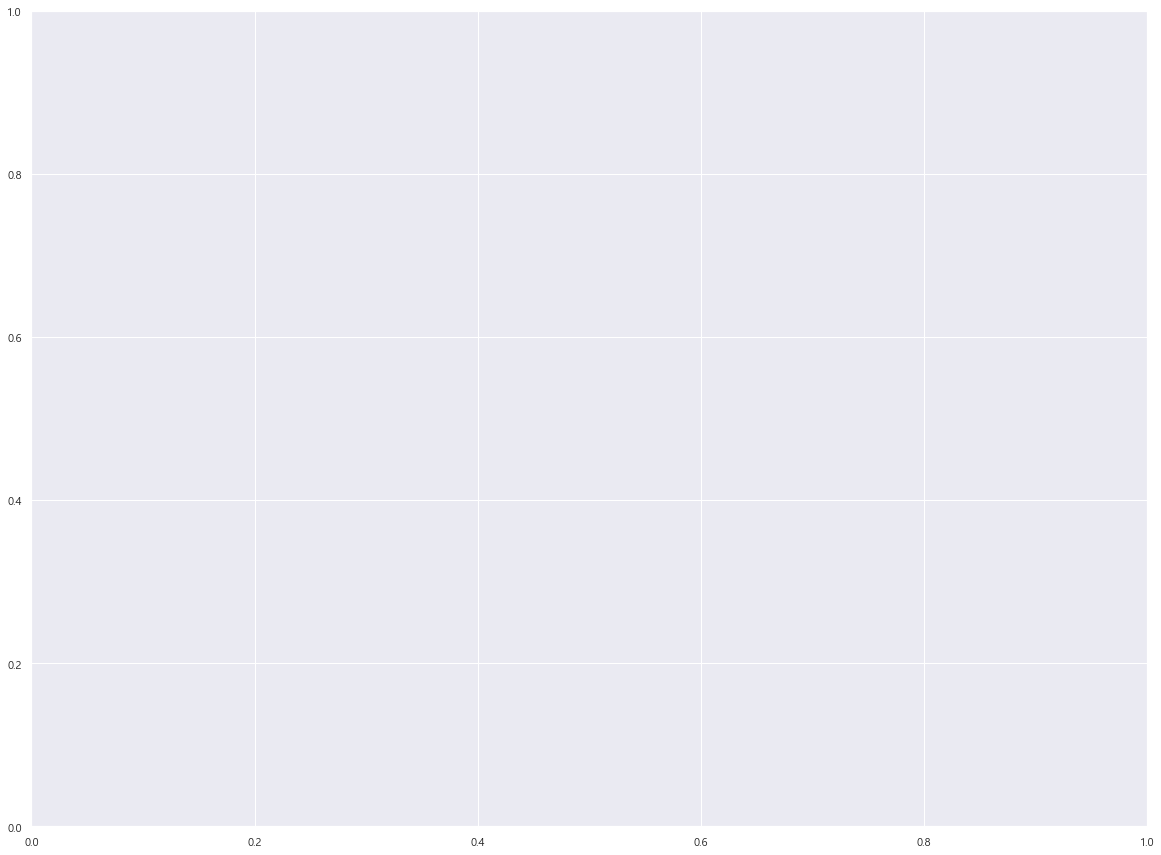

In [68]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 상관계수 확인

In [74]:
print(ridge_loaded_model.coef_)

[[ 493.03546933    8.37913701 7013.3945221  -470.74240252]]
